# Learning Pandas
## Basic objects: Series, DataFrame and Index

In [60]:
import numpy as np
import pandas as pd
import matplotlib
import datetime
from datetime import datetime, date
import matplotlib.pyplot as plt
%matplotlib inline

### Объект Series

Объект Series может иметь только один столбец значений, связанных с метками индекса.

In [3]:
#создадим объект series из питоновского списка
s = pd.Series([1, 2, 3, 4])
s

0    1
1    2
2    3
3    4
dtype: int64

In [7]:
#получение значения по индексу
s[[1, 3]]

1    2
3    4
dtype: int64

In [9]:
#создание series с кастомными метками индекса (строки)
s = pd.Series([1, 2, 3, 4], index = ['a', 'b', 'c', 'd'])
s[['a', 'd']]

a    1
d    4
dtype: int64

In [11]:
#получение значения по индексу - возможность остается
s[[0, 3]]

a    1
d    4
dtype: int64

In [12]:
#получение индекса объекта Series
s.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [17]:
# создаем объект Series, индекс которого - серия дат между двумя определенными датами (включительно) - временной ряд
dates = pd.date_range('2019-05-23', '2019-05-28')
temps1 = pd.Series([80, 82, 85, 90, 83, 87], index = dates)
temps1['2019-05-27']

83

In [19]:
#вычислим разницу температур между двумя сериями наблюдений
temps2 = pd.Series([70, 75, 69, 83, 79, 77], index = dates)
temps_diff = temps1 - temps2
temps_diff.mean()

9.0

### Объект DataFrame

Датафрейм представляет собой один или несколько объектов Series, упорядоченных по меткам индекса. Каждая серия будет столбцом в датафрейме и каждый столбец может иметь соответствующее имя. Существует тонкая разница между объектами DataFrame и Series: в DataFrame мы извлекаем столбцы, в Series - строки.

In [24]:
#создадим DataFrame с двумя сериями temps1 и temps2
temps_df = pd.DataFrame({'Missoula': temps1, 'Philadelphia': temps2})
temps_df

,Missoula,Philadelphia
2019-05-23,80,70
2019-05-24,82,75
2019-05-25,85,69
2019-05-26,90,83
2019-05-27,83,79
2019-05-28,87,77


In [21]:
#вывод столбцов по имени
temps_df['Philadelphia']

2019-05-23    70
2019-05-24    75
2019-05-25    69
2019-05-26    83
2019-05-27    79
2019-05-28    77
Freq: D, Name: Philadelphia, dtype: int64

In [25]:
temps_df[['Missoula', 'Philadelphia']]

,Missoula,Philadelphia
2019-05-23,80,70
2019-05-24,82,75
2019-05-25,85,69
2019-05-26,90,83
2019-05-27,83,79
2019-05-28,87,77


In [26]:
#вывод столбца через "вычисляемое свойство" (возможно, если в имени нет пробелов)
temps_df.Missoula

2019-05-23    80
2019-05-24    82
2019-05-25    85
2019-05-26    90
2019-05-27    83
2019-05-28    87
Freq: D, Name: Missoula, dtype: int64

In [28]:
#вычисление разницы столбцов в датафрейме
temps_df.Missoula - temps_df.Philadelphia

2019-05-23    10
2019-05-24     7
2019-05-25    16
2019-05-26     7
2019-05-27     4
2019-05-28    10
Freq: D, dtype: int64

In [31]:
#добавление столбца
temps_df['Difference'] = temps_diff
temps_df

,Missoula,Philadelphia,Difference
2019-05-23,80,70,10
2019-05-24,82,75,7
2019-05-25,85,69,16
2019-05-26,90,83,7
2019-05-27,83,79,4
2019-05-28,87,77,10


In [32]:
#получение имен столбцов
temps_df.columns

Index(['Missoula', 'Philadelphia', 'Difference'], dtype='object')

In [33]:
#срез определенных строк в заданном столбце (конец диапазона не включается)
temps_df.Difference[1:4]

2019-05-24     7
2019-05-25    16
2019-05-26     7
Freq: D, Name: Difference, dtype: int64

In [37]:
#извлечение сток из датафрейма по позиции
temps_df.iloc[1]

Missoula        82
Philadelphia    75
Difference       7
Name: 2019-05-24 00:00:00, dtype: int64

In [39]:
#названия столбцов стали метками индекса
temps_df.iloc[1].index

Index(['Missoula', 'Philadelphia', 'Difference'], dtype='object')

In [36]:
#извлечение сток из датафрейма по метке индекса
temps_df.loc['2019-05-26']

Missoula        90
Philadelphia    83
Difference       7
Name: 2019-05-26 00:00:00, dtype: int64

In [40]:
#получаем значения столбца difference в строках 1, 3 и 5 (нумерация с 0)
temps_df.iloc[[1, 3, 5]].Difference

2019-05-24     7
2019-05-26     7
2019-05-28    10
Freq: 2D, Name: Difference, dtype: int64

In [42]:
#отбор строк по логическому выражению
temps_df[temps_df.Missoula > 82]

,Missoula,Philadelphia,Difference
2019-05-25,85,69,16
2019-05-26,90,83,7
2019-05-27,83,79,4
2019-05-28,87,77,10


In [54]:
#загрузка данных из csv-файла в объект DataFrame, столбец Date читаем в формате Timestamp и указываем его индексом
df = pd.read_csv('goog.csv', parse_dates=['Date'], index_col='Date')
df.head(10)

,Open,High,Low,Close,Volume
Date,,,,,
2016-12-19,790.219971,797.659973,786.270020,794.200012,1225900
2016-12-20,796.760010,798.650024,793.270020,796.419983,925100
2016-12-21,795.840027,796.676025,787.099976,794.559998,1208700
2016-12-22,792.359985,793.320007,788.580017,791.260010,969100
2016-12-23,790.900024,792.739990,787.280029,789.909973,623400
2016-12-27,790.679993,797.859985,787.656982,791.549988,789100
2016-12-28,793.700012,794.229980,783.200012,785.049988,1132700
2016-12-29,783.330017,785.929993,778.919983,782.789978,742200
2016-12-30,782.750000,782.780029,770.409973,771.820007,1760200


In [52]:
type(df.Date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [55]:
df.index

DatetimeIndex(['2016-12-19', '2016-12-20', '2016-12-21', '2016-12-22',
               '2016-12-23', '2016-12-27', '2016-12-28', '2016-12-29',
               '2016-12-30', '2017-01-03', '2017-01-04', '2017-01-05',
               '2017-01-06', '2017-01-09', '2017-01-10', '2017-01-11',
               '2017-01-12', '2017-01-13', '2017-01-17', '2017-01-18',
               '2017-01-19', '2017-01-20', '2017-01-23', '2017-01-24',
               '2017-01-25', '2017-01-26', '2017-01-27', '2017-01-30',
               '2017-01-31', '2017-02-01', '2017-02-02', '2017-02-03',
               '2017-02-06', '2017-02-07', '2017-02-08', '2017-02-09',
               '2017-02-10', '2017-02-13', '2017-02-14', '2017-02-15',
               '2017-02-16', '2017-02-17', '2017-02-21', '2017-02-22',
               '2017-02-23', '2017-02-24', '2017-02-27', '2017-02-28',
               '2017-03-01', '2017-03-02', '2017-03-03', '2017-03-06',
               '2017-03-07', '2017-03-08', '2017-03-09', '2017-03-10',
      

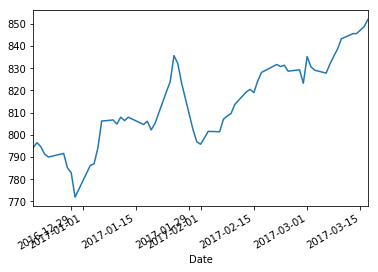

In [58]:
#визуализация
df.Close.plot()

## Series подробно

Три метода создания объекта Series:
- с помощью питоновского списка или словаря
- с помощью массивов NumPy
- использование скалярного значения

In [64]:
#создание серии с одинаковыми значениями
pd.Series(['hey']*5)

0    hey
1    hey
2    hey
3    hey
4    hey
dtype: object

In [65]:
#еще один интересный способ создания серии
pd.Series(list('абырывалг'))

0    а
1    б
2    ы
3    р
4    ы
5    в
6    а
7    л
8    г
dtype: object

In [66]:
#создание серии из словаря
pd.Series({'Mike': 'Dad', 'Marcia': 'Mom', 'Michael': 'Son', 'Bleu': 'Best doggy ever'})

Mike                   Dad
Marcia                 Mom
Michael                Son
Bleu       Best doggy ever
dtype: object

In [68]:
#создание серии с помощью функций NumPy (конец диапазона не включается)
pd.Series(np.arange(4, 9))

0    4
1    5
2    6
3    7
4    8
dtype: int64

In [70]:
#задаем интервал и кол-во значений (конец диапазона включается)
pd.Series(np.linspace(0, 9, 5))

0    0.00
1    2.25
2    4.50
3    6.75
4    9.00
dtype: float64

In [72]:
#создаем серию из 5 нормально распределенных случайных чисел
np.random.seed(12345)
pd.Series(np.random.normal(size=5))

0   -0.204708
1    0.478943
2   -0.519439
3   -0.555730
4    1.965781
dtype: float64

In [75]:
#получение значений серии, результатом является массив NumPy
s = pd.Series([1, 2, 3])
type(s.values)

numpy.ndarray

In [76]:
s.index

RangeIndex(start=0, stop=3, step=1)

In [79]:
#размер объекта Series, способы получения
s = pd.Series([0, 1, 2, 3])
len(s)
s.size
s.shape

(4,)

In [80]:
#создание серии с явным указанием индекса
labels = ['Mike', 'Marcia', 'Mikael', 'Bleu']
role = ['Dad', 'Mom', 'Son', 'Dog']
pd.Series(labels, index=role)

Dad      Mike
Mom    Marcia
Son    Mikael
Dog      Bleu
dtype: object

In [85]:
#вывод части значений
s = pd.Series(np.arange(1,10), index=list('abcdefghi'))
s.head()
s.tail()
s.take([1, 3, 5, 7])

b    2
d    4
f    6
h    8
dtype: int64

In [88]:
#поиск по метке, с учетом того, что метка может не существовать
s.reindex(['a', 'z'])

a    1.0
z    NaN
dtype: float64

In [96]:
#получение срезов
s = pd.Series(np.arange(100, 110), index=np.arange(10, 20))
s[1:6]
s[1:6:2]
s[:5] #аналогично s.head()
s[4:]
s[::-1] #отбор в обратном порядке
s[-4:] #отбор последних n строк
s[:-4] #отбор всех строк кроме последних 4х

10    100
11    101
12    102
13    103
14    104
15    105
dtype: int64

In [97]:
# эквивалентно s.tail(4).head(3)
s[-4:-1] #сначала извлекает последние 4 строки, затем из них - все, короме последней

16    106
17    107
18    108
dtype: int64

In [98]:
#выравнивание данных с помощью меток индекса
s1 = pd.Series([1, 2], index=['a', 'b'])
s2 = pd.Series([4, 3], index=['b', 'a'])
s1 + s2

a    4
b    6
dtype: int64

In [99]:
#скалярное значение применяется к каждому значению в объекте Series
s1 * 2

a    2
b    4
dtype: int64

In [100]:
#метки в индексах не обязательны для выравнивания, если выравнивание не происходит, возвращается NaN
s3 = pd.Series([5, 6], index=['b', 'c'])
s1 + s3

a    NaN
b    7.0
c    NaN
dtype: float64

In [101]:
#метки не должны быть уникальными
s1 = pd.Series([1.0, 2.0, 3.0], index=['a', 'a', 'b'])
s2 = pd.Series([4.0, 5.0, 6.0, 7.0], index=['a', 'a', 'c', 'a'])
s1 + s2

a    5.0
a    6.0
a    8.0
a    6.0
a    7.0
a    9.0
b    NaN
c    NaN
dtype: float64

In [107]:
#отбор на основе значений
s = pd.Series(np.arange(0, 5), index=list('abcde'))
logical_results = s >= 3
s[logical_results]
s[s >= 3] #эквивалент

d    3
e    4
dtype: int64

In [108]:
s[(s >= 2) & (s < 5)]

c    2
d    3
e    4
dtype: int64

In [111]:
#проверка значений на условия
(s >= 0).all() #все значения удовлетворяют условиям
s[s < 2].any() #есть хоть один элемент, удовлетворяющий условию

True

In [112]:
#сколько значений > 2?
s[s > 2].sum() #суммируются значения True(=1)

7

In [116]:
#переиндексация
np.random.seed(123456)
s = pd.Series(np.random.randn(5))
s.index = ['a', 'b', 'c', 'd', 'e']
s

a    0.469112
b   -0.282863
c   -1.509059
d   -1.135632
e    1.212112
dtype: float64

In [118]:
#приведение типа меток индекса
s1 = pd.Series([0, 1, 2], index=[0, 1, 2])
s2 = pd.Series([3, 4, 5], index=['0', '1', '2'])
s1 + s2 #возвращает все NaN
s2.index = s2.index.values.astype(int) #приведем метки к int
s1 + s2

0    3
1    5
2    7
dtype: int64

In [120]:
#заполнить отсутствующие значения нулями
s2 = s.copy()
s2.reindex(['a', 'f'], fill_value=0)

a    0.469112
f    0.000000
dtype: float64

In [123]:
#интерполяция значений
s3 = pd.Series(['red', 'green', 'blue'], index=[0, 3, 5])
s3.reindex(np.arange(0, 7), method='ffill') #last known value
s3.reindex(np.arange(0, 7), method='bfill') #backward filling

0      red
1    green
2    green
3    green
4     blue
5     blue
6      NaN
dtype: object

In [129]:
#модификация Series на месте
np.random.seed(123456)
s = pd.Series(np.random.randn(3), index=['a', 'b', 'c'])
s['d'] = 100
s['d'] = -100
del(s['a'])
s

b     -0.282863
c     -1.509059
d   -100.000000
dtype: float64

### DataFrame подробно

In [132]:
#создание df на основе ф-цийй NumPy
pd.DataFrame(np.arange(1, 6))
df = pd.DataFrame(np.array([[10, 11], [20, 21]])) #из многомерного массива NumPy
df

,0,1
0,10,11
1,20,21


In [133]:
df.columns #по умолчанию, если столбцы не заданы, pandas создает RangeIndex

RangeIndex(start=0, stop=2, step=1)

In [134]:
#задаем имена столбцов
df = pd.DataFrame(np.array([[70, 71], [90, 91]]), columns=['Missoula', 'Philadelphia'])
df

,Missoula,Philadelphia
0,70,71
1,90,91


In [182]:
#кол-во строк
len(df)
#размерность
df.shape

(2, 2)

In [138]:
#создать df из словаря
temps_missoula = [70, 71]
temps_philly = [90, 91]
temperatures = {'Missoula': temps_missoula, 'Philadelphia': temps_philly}
pd.DataFrame(temperatures)

,Missoula,Philadelphia
0,70,90
1,71,91


In [144]:
#создать df из списка объектов Series
temps_at_time0 = pd.Series([70, 90])
temps_at_time1 = pd.Series([71, 91])
df = pd.DataFrame([temps_at_time0, temps_at_time1])
df.columns = ['Missoula', 'Philadelphia']
df

,Missoula,Philadelphia
0,70,90
1,71,91


In [146]:
#создать из csv файла
#загружаем только 4 столбца, Symbol - индекс
sp500 = pd.read_csv('sp500.csv', index_col='Symbol', usecols=[0, 2, 3, 7])
sp500.head()

,Sector,Price,Book Value
Symbol,,,
MMM,Industrials,141.14,26.668
ABT,Health Care,39.60,15.573
ABBV,Health Care,53.95,2.954
ACN,Information Technology,79.79,8.326
ACE,Financials,102.91,86.897


In [181]:
len(sp500)
sp500.shape
sp500.size

1500

In [151]:
sp500.index

Index(['MMM', 'ABT', 'ABBV', 'ACN', 'ACE', 'ACT', 'ADBE', 'AES', 'AET', 'AFL',
       ...
       'XEL', 'XRX', 'XLNX', 'XL', 'XYL', 'YHOO', 'YUM', 'ZMH', 'ZION', 'ZTS'],
      dtype='object', name='Symbol', length=500)

In [153]:
#извлечение столбца
sp500['Sector'].head()

Symbol
MMM                Industrials
ABT                Health Care
ABBV               Health Care
ACN     Information Technology
ACE                 Financials
Name: Sector, dtype: object

In [154]:
#результат - объект Series
type(sp500['Sector'])

pandas.core.series.Series

In [156]:
#извлечь несколько столбцов (результат - объект DataFrame)
sp500[['Price', 'Book Value']].head()

,Price,Book Value
Symbol,,
MMM,141.14,26.668
ABT,39.60,15.573
ABBV,53.95,2.954
ACN,79.79,8.326
ACE,102.91,86.897


In [158]:
#еще способ извлечь столбец
sp500.Price.head()

Symbol
MMM     141.14
ABT      39.60
ABBV     53.95
ACN      79.79
ACE     102.91
Name: Price, dtype: float64

In [160]:
#отбор строк по метке индекса
sp500.loc['MMM']
#или списку меток индекса
sp500.loc[['MMM', 'MSFT']]

,Sector,Price,Book Value
Symbol,,,
MMM,Industrials,141.14,26.668
MSFT,Information Technology,40.12,10.584


In [161]:
sp500.iloc[[0, 2]]

,Sector,Price,Book Value
Symbol,,,
MMM,Industrials,141.14,26.668
ABBV,Health Care,53.95,2.954


In [163]:
#получить позиции меток в индексе и по ним получить строки
i1 = sp500.index.get_loc('MMM')
i2 = sp500.index.get_loc('A')
sp500.iloc[[i1, i2]]

,Sector,Price,Book Value
Symbol,,,
MMM,Industrials,141.14,26.668
A,Health Care,56.18,16.928


In [164]:
#поиск значения по метке строки и метке (имени) столбца
sp500.at['MMM', 'Price']

141.14

In [165]:
#поиск значения по позиции строки и позиции столбца (max производительность)
sp500.iat[0, 1]

141.14

In [168]:
#создание среза
sp500[:5] #первые 5 строк
sp500['ABT':'ACN'] #срез по меткам

,Sector,Price,Book Value
Symbol,,,
ABT,Health Care,39.60,15.573
ABBV,Health Care,53.95,2.954
ACN,Information Technology,79.79,8.326


In [172]:
#логический отбор
sp500[sp500.Price < 100]
sp500[(sp500.Price < 10) & (sp500.Price > 6)]['Price']
sp500[(sp500.Sector == 'Health Care') & (sp500.Price > 100)][['Price', 'Sector']]

,Price,Sector
Symbol,,
ACT,213.77,Health Care
ALXN,162.30,Health Care
AGN,166.92,Health Care
AMGN,114.33,Health Care
BCR,146.62,Health Care
BDX,115.70,Health Care
BIIB,299.71,Health Care
CELG,150.13,Health Care
HUM,124.49,Health Care


In [173]:
#отбор строк и столбцов по меткам индекса и заданным столбцам
sp500.loc[['ABT', 'ZTS']][['Sector', 'Price']]

,Sector,Price
Symbol,,
ABT,Health Care,39.60
ZTS,Health Care,30.53


In [177]:
#переименовать столбцы
newSP500 = sp500.rename(columns={'Book Value': 'BookValue'})
newSP500.head()
#или переименовываем в исходном датафрейме
sp500.rename(columns={'Book Value': 'BookValue'}, inplace=True)
sp500.head()

,Sector,Price,BookValue
Symbol,,,
MMM,Industrials,141.14,26.668
ABT,Health Care,39.60,15.573
ABBV,Health Care,53.95,2.954
ACN,Information Technology,79.79,8.326
ACE,Financials,102.91,86.897


In [178]:
#добавление новых столбцов (модификация дф на месте)
sp500_copy = sp500.copy()
sp500_copy['RoundedPrice'] = sp500.Price.round()
sp500_copy.head()

,Sector,Price,BookValue,RoundedPrice
Symbol,,,,
MMM,Industrials,141.14,26.668,141.0
ABT,Health Care,39.60,15.573,40.0
ABBV,Health Care,53.95,2.954,54.0
ACN,Information Technology,79.79,8.326,80.0
ACE,Financials,102.91,86.897,103.0


In [180]:
#вставить столбец в заданную позицию (модификация дф на месте)
copy = sp500.copy()
copy.insert(1, 'RoundedPrice', sp500.Price.round())
copy.head()

,Sector,RoundedPrice,Price,BookValue
Symbol,,,,
MMM,Industrials,141.0,141.14,26.668
ABT,Health Care,40.0,39.60,15.573
ABBV,Health Care,54.0,53.95,2.954
ACN,Information Technology,80.0,79.79,8.326
ACE,Financials,103.0,102.91,86.897


In [184]:
#создаем срез в копии и добавляем столбец с нулевыми значениями
ss = sp500[:3].copy()
ss.loc[:, 'PER'] = 0
ss

,Sector,Price,BookValue,PER
Symbol,,,,
MMM,Industrials,141.14,26.668,0
ABT,Health Care,39.60,15.573,0
ABBV,Health Care,53.95,2.954,0


In [186]:
#добавим столбец и заполним его серией со случайно сген значениями (индексы должны быть теми же для выравнивания)
ss = sp500[:3].copy()
np.random.seed(123456)
ss.loc[:, 'PER'] = pd.Series(np.random.normal(size=3), index=ss.index)
ss

,Sector,Price,BookValue,PER
Symbol,,,,
MMM,Industrials,141.14,26.668,0.469112
ABT,Health Care,39.60,15.573,-0.282863
ABBV,Health Care,53.95,2.954,-1.509059


In [189]:
#добавление столбцов с помощью конкатенации (новый дф)
rounded_price = pd.DataFrame({'RoundedPrice': sp500.Price.round()})
concatenated = pd.concat([sp500, rounded_price], axis=1)
concatenated[:5]

,Sector,Price,BookValue,RoundedPrice
Symbol,,,,
MMM,Industrials,141.14,26.668,141.0
ABT,Health Care,39.60,15.573,40.0
ABBV,Health Care,53.95,2.954,54.0
ACN,Information Technology,79.79,8.326,80.0
ACE,Financials,102.91,86.897,103.0


In [192]:
#переупорядочить столбцы
reversed_cols = sp500.columns[::-1]
sp500[reversed_cols].head()

,BookValue,Price,Sector
Symbol,,,
MMM,26.668,141.14,Industrials
ABT,15.573,39.60,Health Care
ABBV,2.954,53.95,Health Care
ACN,8.326,79.79,Information Technology
ACE,86.897,102.91,Financials


In [193]:
#замена содержимого столбца
copy1 = sp500.copy()
copy1.Price = rounded_price.RoundedPrice
copy1.head()

,Sector,Price,BookValue
Symbol,,,
MMM,Industrials,141.0,26.668
ABT,Health Care,40.0,15.573
ABBV,Health Care,54.0,2.954
ACN,Information Technology,80.0,8.326
ACE,Financials,103.0,86.897


In [194]:
#замена с помощью среза
copy2  = sp500.copy()
copy2.loc[:, 'Price'] = rounded_price.RoundedPrice
copy2.head()

,Sector,Price,BookValue
Symbol,,,
MMM,Industrials,141.0,26.668
ABT,Health Care,40.0,15.573
ABBV,Health Care,54.0,2.954
ACN,Information Technology,80.0,8.326
ACE,Financials,103.0,86.897


In [199]:
#удаление столбцов: del, pop(), drop()
copy3 = sp500.copy()
del copy3['BookValue']
copy3.head()
copy4 = sp500.copy()
popped = copy4.pop('Sector')
copy4.head()
popped[:5] #возвращает удаленные столбцы

Symbol
MMM                Industrials
ABT                Health Care
ABBV               Health Care
ACN     Information Technology
ACE                 Financials
Name: Sector, dtype: object

In [200]:
#drop для удаления столбцов
copy5 = sp500.copy()
afterdrop = copy5.drop(['Sector'], axis=1)
afterdrop.head()

,Price,BookValue
Symbol,,
MMM,141.14,26.668
ABT,39.60,15.573
ABBV,53.95,2.954
ACN,79.79,8.326
ACE,102.91,86.897


In [201]:
#drop для удаления строк
copy6 = sp500.copy()
afterdrop = copy6.drop(['MMM'], axis=0)
afterdrop.head()

,Sector,Price,BookValue
Symbol,,,
ABT,Health Care,39.60,15.573
ABBV,Health Care,53.95,2.954
ACN,Information Technology,79.79,8.326
ACE,Financials,102.91,86.897
ACT,Health Care,213.77,55.188


In [202]:
#добавление строк (не выполняет выравнивания и м привести к дублированию меток индексов)
df1 = sp500.iloc[0:3].copy() #первые 3 строки дф
df2 = sp500.iloc[[10, 11, 2]].copy() #строки с позициями 10, 11 и 2
appended = df1.append(df2)
appended
#видим, что строка 2 задублировалась

,Sector,Price,BookValue
Symbol,,,
MMM,Industrials,141.14,26.668
ABT,Health Care,39.60,15.573
ABBV,Health Care,53.95,2.954
A,Health Care,56.18,16.928
GAS,Utilities,52.98,32.462
ABBV,Health Care,53.95,2.954


In [206]:
#в итоговом дф будут столбцы обоих дф, если во втором дф столбца нет, то значения будут NaN
df3 = pd.DataFrame(0.0, index=df1.index, columns=['PER'])
df1.append(df3, sort=True)

,BookValue,PER,Price,Sector
Symbol,,,,
MMM,26.668,NaN,141.14,Industrials
ABT,15.573,NaN,39.60,Health Care
ABBV,2.954,NaN,53.95,Health Care
MMM,NaN,0.0,NaN,NaN
ABT,NaN,0.0,NaN,NaN
ABBV,NaN,0.0,NaN,NaN


In [207]:
#не учитывать индекс
df1.append(df3, ignore_index=True, sort=True)

,BookValue,PER,Price,Sector
0,26.668,NaN,141.14,Industrials
1,15.573,NaN,39.60,Health Care
2,2.954,NaN,53.95,Health Care
3,NaN,0.0,NaN,NaN
4,NaN,0.0,NaN,NaN
5,NaN,0.0,NaN,NaN


In [209]:
#конкатенация строк по умолчанию работает также как append
df1 = sp500.iloc[0:3]
df2 = sp500.iloc[[10, 11, 2]]
pd.concat([df1, df2])

,Sector,Price,BookValue
Symbol,,,
MMM,Industrials,141.14,26.668
ABT,Health Care,39.60,15.573
ABBV,Health Care,53.95,2.954
A,Health Care,56.18,16.928
GAS,Utilities,52.98,32.462
ABBV,Health Care,53.95,2.954


In [210]:
#задаем ключи исходных дф при объединении
pd.concat([df1, df2], keys=['df1', 'df2'], sort=True)

BookValue   Price       Sector
    Symbol                                
df1 MMM        26.668  141.14  Industrials
    ABT        15.573   39.60  Health Care
    ABBV        2.954   53.95  Health Care
df2 A          16.928   56.18  Health Care
    GAS        32.462   52.98    Utilities
    ABBV        2.954   53.95  Health Care

In [214]:
#добавление или замена строк (если метка индекса существует, значения строки будут заменены, иначе - новая строка)
ss = sp500[:3].copy()
ss.loc['FOO'] = ['the sector', 100, 100]
ss

,Sector,Price,BookValue
Symbol,,,
MMM,Industrials,141.14,26.668
ABT,Health Care,39.60,15.573
ABBV,Health Care,53.95,2.954
FOO,the sector,100.00,100.000


In [219]:
#удаление строк с помощью логического отбора через побитовое отрицание
selection = sp500.Price > 300
(len(selection), selection.sum()) #сколько всего строк и сколько к удалению
price_less_than_300 = sp500[~selection]
price_less_than_300.shape

(490, 3)

### Индексы

In [220]:
#тестовый дф
np.random.seed(123456)
df = pd.DataFrame({'foo': np.random.random(10000), 'key':range(100, 10100)})
df.head()

,foo,key
0,0.126970,100
1,0.966718,101
2,0.260476,102
3,0.897237,103
4,0.376750,104


In [221]:
#измеряем время выполнения операции отбора
%timeit df[df.key == 10099]

619 µs ± 37.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [224]:
#превращаем столбец key в индекс
df_ind = df.set_index(['key'])
df_ind.head()

,foo
key,
100,0.126970
101,0.966718
102,0.260476
103,0.897237
104,0.376750


In [225]:
#теперь можно найти с помощью .loc - гораздо быстрее
%timeit df_ind.loc[10099]

114 µs ± 14 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Недостаток использования индекса заключается в том, что потребуется время на его создание, кроме того, он занимает больше памяти.

In [227]:
#создаем DatetimeIndex 5 значений с интервалом в час
date_times = pd.DatetimeIndex(pd.date_range('5/1/2017', periods=5, freq='H'))
date_times

DatetimeIndex(['2017-05-01 00:00:00', '2017-05-01 01:00:00',
               '2017-05-01 02:00:00', '2017-05-01 03:00:00',
               '2017-05-01 04:00:00'],
              dtype='datetime64[ns]', freq='H')

In [228]:
#создаем дф с этим индексом
df_dt = pd.DataFrame(np.arange(0, len(date_times)), index=date_times)
df_dt

,0
2017-05-01 00:00:00,0
2017-05-01 01:00:00,1
2017-05-01 02:00:00,2
2017-05-01 03:00:00,3
2017-05-01 04:00:00,4


In [229]:
#задаем индекс уже существующего дф
df_dt.index = pd.DatetimeIndex(pd.date_range('6/1/2017', periods=5, freq='H'))
df_dt

,0
2017-06-01 00:00:00,0
2017-06-01 01:00:00,1
2017-06-01 02:00:00,2
2017-06-01 03:00:00,3
2017-06-01 04:00:00,4


In [232]:
#сбросить индекс дф и перенести его значения в столбец данных
idx_to_col = sp500.reset_index()
idx_to_col.head()

,Symbol,Sector,Price,BookValue
0,MMM,Industrials,141.14,26.668
1,ABT,Health Care,39.60,15.573
2,ABBV,Health Care,53.95,2.954
3,ACN,Information Technology,79.79,8.326
4,ACE,Financials,102.91,86.897


In [233]:
#устанавливаем индекс
idx_to_col.set_index('Sector').head()

,Symbol,Price,BookValue
Sector,,,
Industrials,MMM,141.14,26.668
Health Care,ABT,39.60,15.573
Health Care,ABBV,53.95,2.954
Information Technology,ACN,79.79,8.326
Financials,ACE,102.91,86.897


In [236]:
#иерархическая индексация
idx_to_col = sp500.reset_index()
multi_fi = idx_to_col.set_index(['Sector', 'Symbol'])
multi_fi.head()

Price  BookValue
Sector                 Symbol                   
Industrials            MMM     141.14     26.668
Health Care            ABT      39.60     15.573
                       ABBV     53.95      2.954
Information Technology ACN      79.79      8.326
Financials             ACE     102.91     86.897

In [237]:
#тип индекса - MultiIndex
type(multi_fi.index)

pandas.core.indexes.multi.MultiIndex

In [239]:
#кол-во уровней - 2
len(multi_fi.index.levels)

2

In [241]:
#каждый уровень индекса - индекс
multi_fi.index.levels[0]
multi_fi.index.levels[1]

Index(['A', 'AA', 'AAPL', 'ABBV', 'ABC', 'ABT', 'ACE', 'ACN', 'ACT', 'ADBE',
       ...
       'XLNX', 'XOM', 'XRAY', 'XRX', 'XYL', 'YHOO', 'YUM', 'ZION', 'ZMH',
       'ZTS'],
      dtype='object', name='Symbol', length=500)

In [242]:
#значения индекса в каждом уровне
multi_fi.index.get_level_values(0)

Index(['Industrials', 'Health Care', 'Health Care', 'Information Technology',
       'Financials', 'Health Care', 'Information Technology', 'Utilities',
       'Health Care', 'Financials',
       ...
       'Utilities', 'Information Technology', 'Information Technology',
       'Financials', 'Industrials', 'Information Technology',
       'Consumer Discretionary', 'Health Care', 'Financials', 'Health Care'],
      dtype='object', name='Sector', length=500)

In [243]:
#получаем все эл-ты с меткой Industrials для индекса уровня 0 (Sector)
#индекс уровня 0 не выводится
multi_fi.xs('Industrials')[:5]

,Price,BookValue
Symbol,,
MMM,141.14,26.668
ALLE,52.46,0.000
APH,95.71,18.315
AVY,48.20,15.616
BA,132.41,19.870


In [245]:
#отбираем строки, в кот индекс уровня 1 (Symbol) имеет значение Alle, сам индекс Symbol не выводится
multi_fi.xs('ALLE', level=1)

,Price,BookValue
Sector,,
Industrials,52.46,0.0


In [247]:
# отбираем строки, в которых индекс уровня 0
# (Sector) имеет значение Industrials,
# без удаления уровней
multi_fi.xs('Industrials', drop_level=False).head()

Price  BookValue
Sector      Symbol                   
Industrials MMM     141.14     26.668
            ALLE     52.46      0.000
            APH      95.71     18.315
            AVY      48.20     15.616
            BA      132.41     19.870

In [249]:
#комбинация уровней индексов
multi_fi.xs('Industrials').xs('UPS') #или
multi_fi.xs(('Industrials', 'UPS'))

Price        102.73
BookValue      6.79
Name: (Industrials, UPS), dtype: float64

### Категориальные переменные

In [250]:
#создаем категориальную переменную из списка
lmh_values = ['low', 'high', 'medium', 'medium', 'high']
lmh_cat = pd.Categorical(lmh_values)
lmh_cat

[low, high, medium, medium, high]
Categories (3, object): [high, low, medium]

In [251]:
#вернемся к ним позже

### Численные и статистические методы

In [253]:
omh = pd.read_csv('omh.csv')
omh

,Date,MSFT,AAPL
0,2014-12-01,48.62,115.07
1,2014-12-02,48.46,114.63
2,2014-12-03,48.08,115.93
3,2014-12-04,48.84,115.49
4,2014-12-05,48.42,115.00
5,2014-12-08,47.70,112.40
6,2014-12-09,47.59,114.12
7,2014-12-10,46.90,111.95
8,2014-12-11,47.17,111.62
9,2014-12-12,46.95,109.73


страница 153